In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline

In [2]:
data=pd.read_csv('baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


There are no missing values in the data set. Hence lets check data dsitributuion

In [4]:
data.shape

(30, 17)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

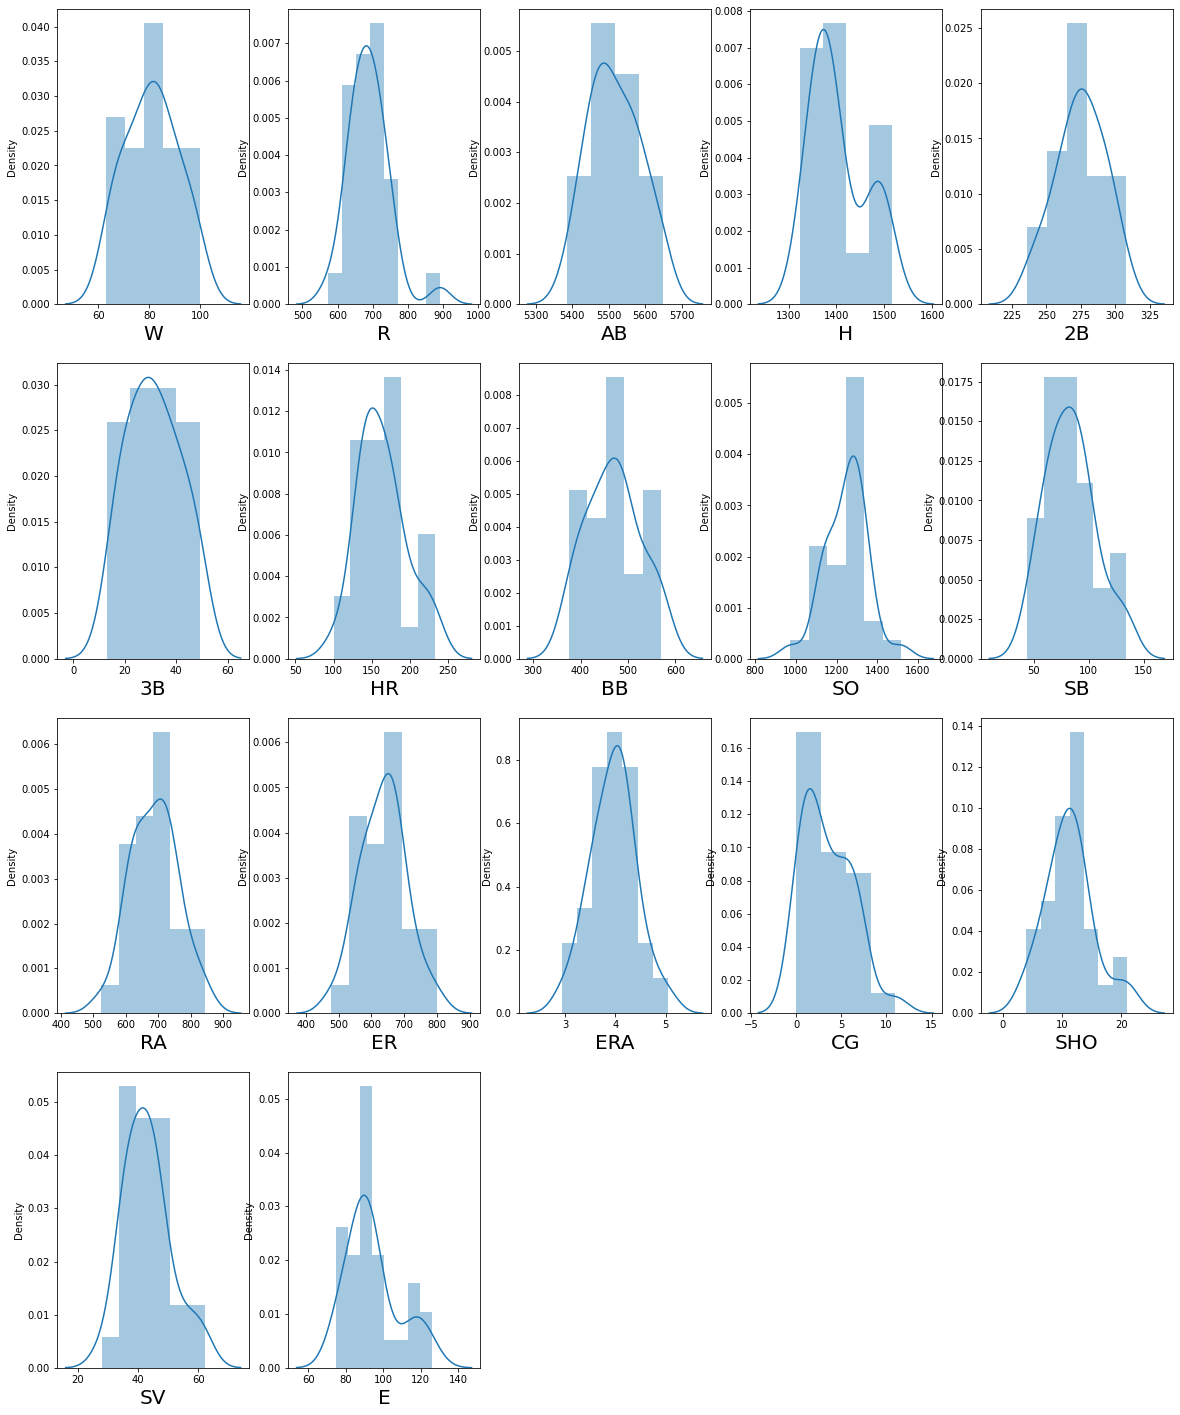

In [5]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=17: # as there are 17 columns in the data
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

There is no skewness in the data. Also, there are only 32 records (very less amount of data) so we do not have the liberty to drop any skewed data or outliers as we don't want to lose any critical information.

Lets start our analysis

In [7]:
x=data.drop(columns=['W'])
y=data['W']

Before we fit the data to a model. Let's visualize the relationship between label and features

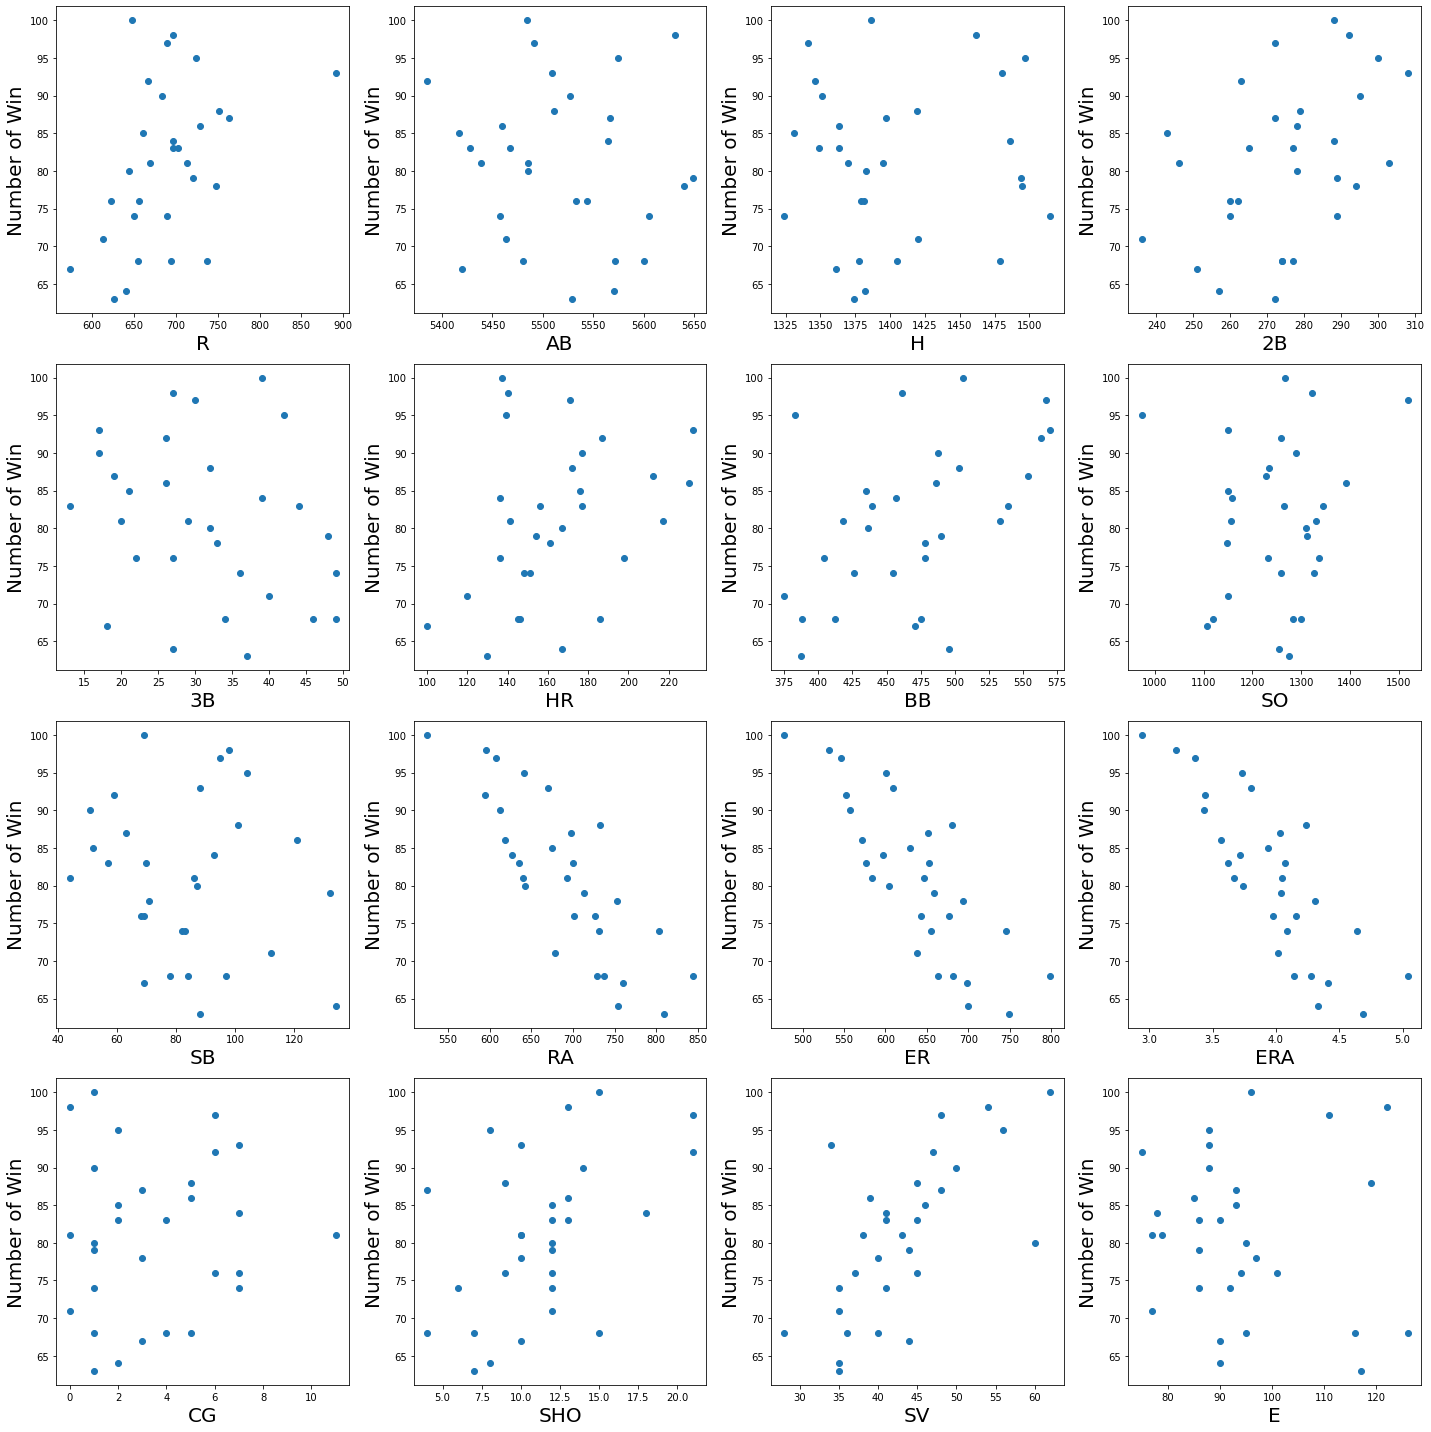

In [8]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <=16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Number of Win',fontsize=20)
    plotnumber+=1
plt.tight_layout()

we can see a linear relationship between label and features like Run(R), Hits(HR), Stolen Bases(BB), Runs Allowed(RA), Earned Runs(ER), Earned Runs Average(ERA), Saves(SV). The linearity assumpotion holds true for some of the labels. Let's build a linear model and see its prediction score.

Scaling the data

In [9]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

Performing the train test split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=340)

In [11]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred_lr=regression.predict(x_test)

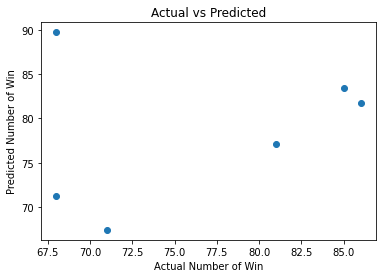

In [13]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Actual Number of Win')
plt.ylabel('Predicted Number of Win')
plt.title('Actual vs Predicted')
plt.show()

Model Evaluation

Lets check how well model fits the test data

In [15]:
regression.score(x_test,y_test)

-0.48364170213625357

The data doesn't fit the Linear Regression model. Let's check Random Forest for the Regression Analysis

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=3, random_state=0)

In [17]:
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=3, random_state=0)

In [18]:
y_pred_rf=regressor.predict(x_test)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
r2_score(y_test,y_pred_rf)

0.2621600621600615

Let's try to reduce the feature by plotting heatmap and find the coefficient of multicolinearity

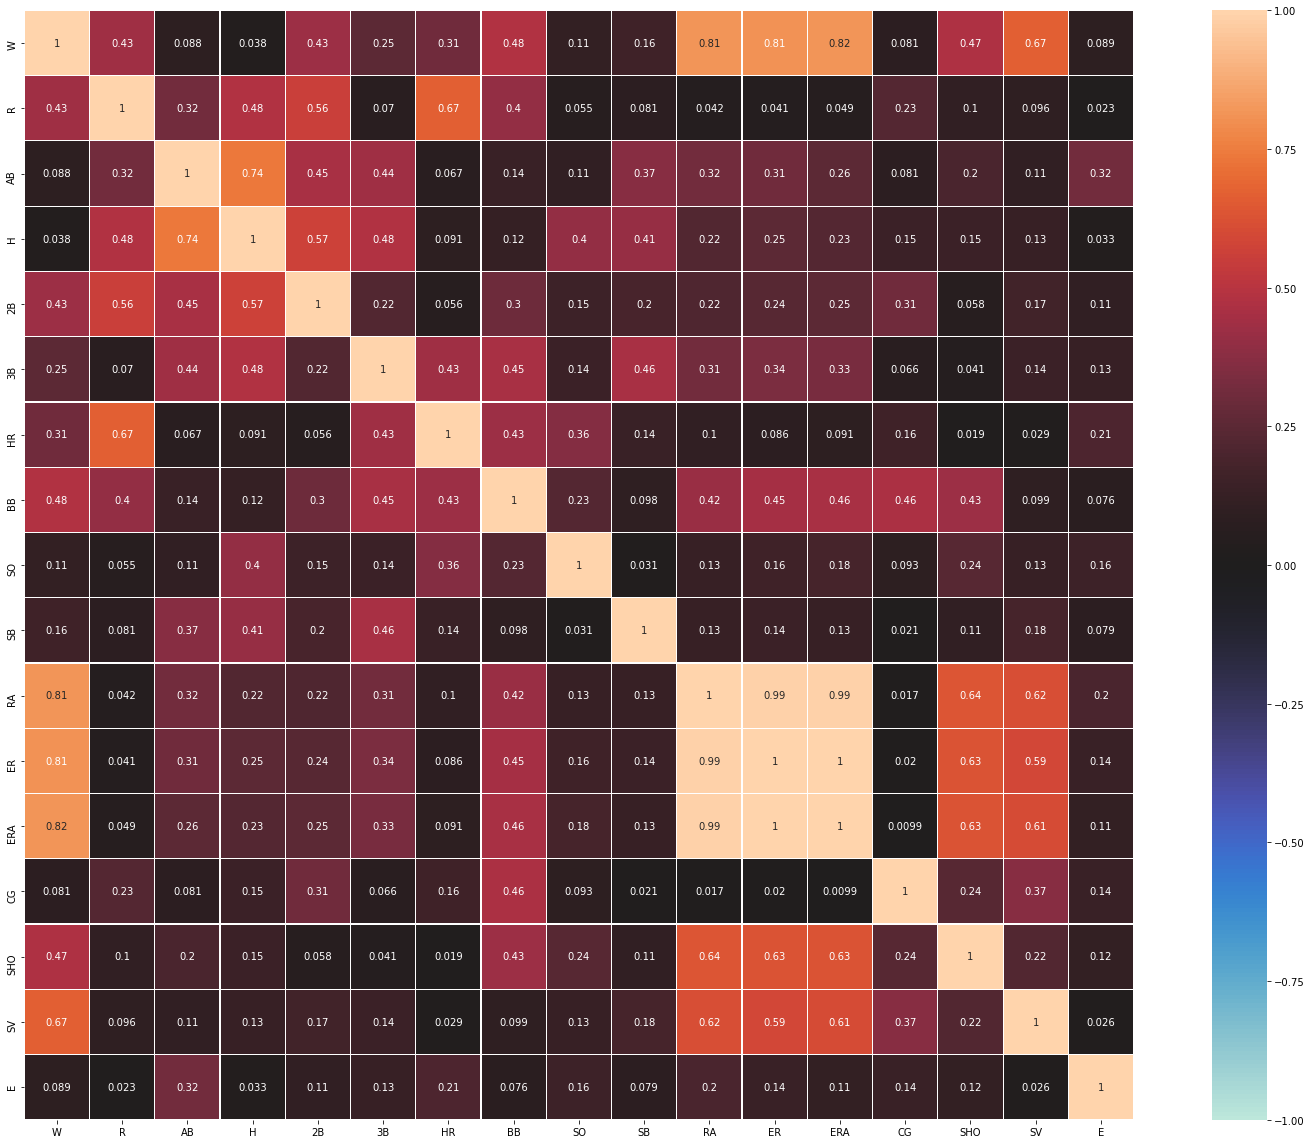

In [21]:
df_corr=data.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr, vmin=-1,vmax=1, annot=True,
            square=True, center=0, fmt='.2g',linewidths=.1)
plt.tight_layout()

From the heat map we can observe that there is s strong corelation between runs allowed, earned runs and earned run average. So, lets the corelation using scatter plot

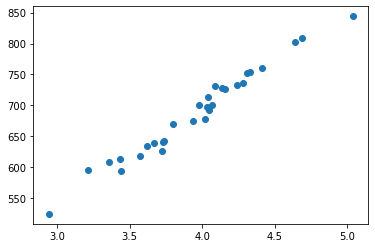

In [22]:
plt.scatter(data.ERA,data.RA)
plt.show()

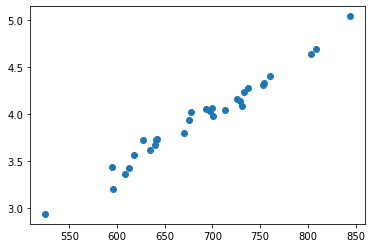

In [23]:
plt.scatter(data.RA,data.ERA)
plt.show()

RA, ERA are strongly corelated. Hence, let's drop RA and ERA

In [24]:
x=data.drop(['W','ERA','RA'], axis=1)
y=data['W']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=101)

Lets perform hyper parameter tuning

In [26]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [28]:
ada=AdaBoostRegressor()

In [29]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [30]:
y_pred_ada=ada.predict(x_train)

In [31]:
print('R square score',metrics.r2_score(y_train,y_pred_ada))

R square score 0.992435020696887


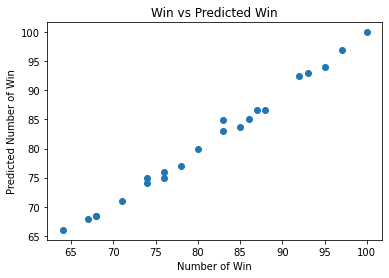

In [32]:
plt.scatter(y_train,y_pred_ada)
plt.xlabel('Number of Win')
plt.ylabel('Predicted Number of Win')
plt.title('Win vs Predicted Win')
plt.show()

In [33]:
# Predicting test data with the model
y_test_pred=ada.predict(x_test)

In [34]:
# Model Evaluation
accuracy=metrics.r2_score(y_test,y_test_pred)
print('R square score:',accuracy)

R square score: 0.6066615814899569


Hyperparamete Tuning using RandomizedSearchCV

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt=DecisionTreeRegressor()

In [37]:
params={'n_estimators':[40,47,49,50], 'learning_rate':[0.30,0.40,0.45]}

In [38]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [39]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [40]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=49)

In [41]:
ada=AdaBoostRegressor(base_estimator=dt,learning_rate=0.4,n_estimators=49)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

Accuracy post tuning
0.6681922196796339


After hyper parameter tuning accuracy increased by 6%

Let's reduce the residual or error by ExtreGradiant Boosting

In [42]:
import xgboost as xgb

In [43]:
xgb = xgb.XGBRegressor()

In [44]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred_xgb = xgb.predict(x_test)

In [52]:
r2_score(y_test,y_pred_xgb)

0.6239706990769927

The extreme gradient boosting didn't help in increasing the accuracy score of the model

In [54]:
import pickle
with open ('BaseballWinPrediction.sav','wb') as f:
    pickle.dump(rnd_srch,f)